## Topic Analysis for 1/4 of Data
- analyze topic distributions
- run a few simple regressions

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [2]:
topicDf = pd.read_csv("/shared/3/projects/benlitterer/localNews/MVP1/firstMallet/70topics/topicKeys.txt", sep="\t", names=["topicNum", "prop", "topicWords"])
topicDf = topicDf.sort_values("prop", ascending=False)

In [3]:
topicDf.head(10)

,topicNum,prop,topicWords
60,60,0.11452,said going get like really think time year lot...
8,8,0.09674,would could one even many may much like time l...
48,48,0.09305,people like know think get going one would wan...
26,26,0.07794,num may june july numth per april march millio...
16,16,0.06969,one like back day time would even around could...
12,12,0.05389,num said people coronavirus new state health p...
69,69,0.05035,community support health help program work ser...
3,3,0.04957,news media twitter facebook video social post ...
41,41,0.04469,world government political people america amer...
0,0,0.04459,trump president said white house donald admini...


In [4]:
topicDict = {1:"Trump/Politics", 27:"Trump/Scandals", 39:"2020 Elections", 68:"2020 Elections/Fraud", 2:"Crime", 25:"Police Activity", 3:"Media", 4:"Labor/Pandemic/Immigration", 5:"Isreal/Palestine/India", 7:"Royal Family/Stars", 23:"BLM - George Floyd", 22:"China", 33:"Religion", 64:"Farms/Animals/Nature", 24:"Sports", 32:"Baseball", 34:"Basketball", 30:"Severe Weather", 12:"Covid/General", 46:"Football", 57:"Covid/Harm Mitigation", 58:"Covid/Negatives/Deaths", 55:"Vaccination", 54:"Covid - Econ", 35:"Race", 14:"Congress"}

topicList = []
for topicNum in topicDf["topicNum"]: 
    if topicNum in topicDict: 
        topicList.append(topicDict[topicNum])
    else: 
        topicList.append(str(topicNum))

topicDf["labeledTopics"] = topicList

In [5]:
topicDf

,topicNum,prop,topicWords,labeledTopics
60,60,0.11452,said going get like really think time year lot...,60
8,8,0.09674,would could one even many may much like time l...,8
48,48,0.09305,people like know think get going one would wan...,48
26,26,0.07794,num may june july numth per april march millio...,26
16,16,0.06969,one like back day time would even around could...,16
...,...,...,...,...
34,34,0.00922,num game points first season team nba half sec...,Basketball
21,21,0.00864,argus/dispatch num quad com times city whbf ou...,21
32,32,0.00789,num game two first season run inning three run...,Baseball
42,42,0.00605,num game first season goal games play team sec...,42


<AxesSubplot:xlabel='prop', ylabel='labeledTopics'>

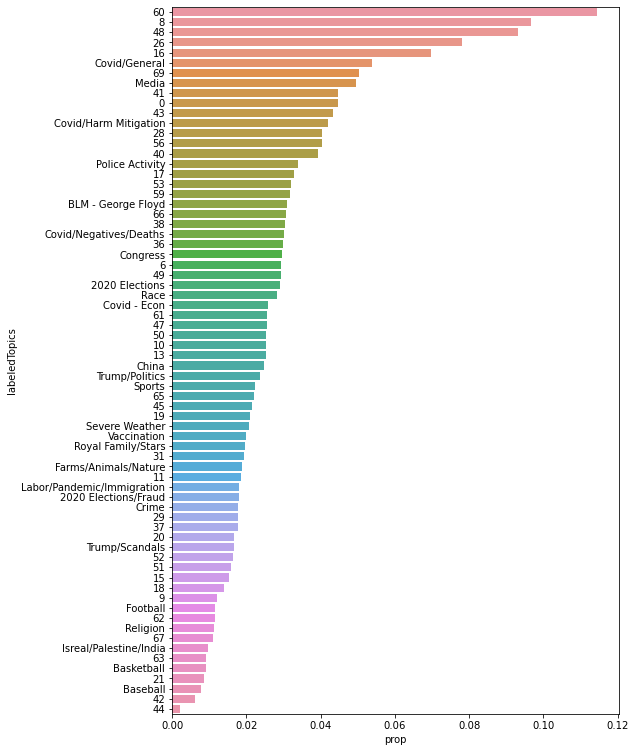

In [6]:
fig = plt.figure(figsize=[8, 13])
sns.barplot(data=topicDf, x="prop", y="labeledTopics", orient = "h")

## Link Articles to Topic Distributions

In [7]:
colNames = ["index", "docNum"] + list(range(0, 70))
docTopics = pd.read_csv("/shared/3/projects/benlitterer/localNews/MVP1/firstMallet/70topics/docTopics.txt", names=colNames, sep="\t")

In [8]:
articleDf = pd.read_csv("/shared/3/projects/benlitterer/localNews/MVP1/mergedArticles.tsv", sep="\t")

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (1,2,6,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,38,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
docTopics.head()

,index,docNum,0,1,2,3,4,5,6,7,...,60,61,62,63,64,65,66,67,68,69
0,0,NaN,0.011074,0.005870,0.004429,0.012311,0.004468,0.002376,0.007266,0.004854,...,0.028443,0.006345,0.002880,0.002292,0.004676,0.005443,0.007588,0.002745,0.004449,0.012505
1,1,2973366.0,0.000768,0.000407,0.000307,0.000854,0.000310,0.000165,0.000504,0.000337,...,0.001974,0.000440,0.000200,0.000159,0.000324,0.000378,0.000526,0.000190,0.000309,0.052568
2,2,2241142.0,0.022823,0.000107,0.000081,0.000224,0.000081,0.000043,0.000132,0.000088,...,0.000518,0.000116,0.000052,0.000042,0.000085,0.000099,0.000138,0.000050,0.000081,0.000228
3,3,340177.0,0.000707,0.000375,0.000283,0.000786,0.000285,0.000152,0.000464,0.016177,...,0.001817,0.000405,0.000184,0.000146,0.000299,0.000348,0.000485,0.000175,0.000284,0.016665
4,4,2883919.0,0.000216,0.000115,0.000087,0.165268,0.000087,0.000046,0.000142,0.000095,...,0.000556,0.000124,0.000056,0.000045,0.000091,0.000106,0.000148,0.000054,0.000087,0.000244


In [10]:
docTopics.shape

(806160, 72)

In [11]:
articleDf.shape

(3224636, 44)

In [12]:
articleDf = articleDf.rename(columns={"Unnamed: 0":"docNum"})
articleDf.head(3)

,docNum,article_id,sourcedomain_id,date,title,content,url_x,fips,source,description,...,predrt_0,predrt_12,predrt_3,national,id,author,url,published,published_utc,collection_utc
0,0,andalusiastarnews--2020-04-04--Remember When: ...,andalusiastarnews-andalusiastarnews.com,2020-04-04,Remember When: Shehan’s Polio story,Dan Shehan’s “My Polio Story” is continued in ...,https://www.andalusiastarnews.com/2020/04/03/r...,1039.0,andalusiastarnews,"Serves Covington County, located in Andalusia....",...,25.04,44.15,30.8,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1,andalusiastarnews--2020-04-04--Veterans Founda...,andalusiastarnews-andalusiastarnews.com,2020-04-04,Veterans Foundation salutes Vietnam veterans,"This past Sunday, March 29th marked National V...",https://www.andalusiastarnews.com/2020/04/03/v...,1039.0,andalusiastarnews,"Serves Covington County, located in Andalusia....",...,25.04,44.15,30.8,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,andalusiastarnews--2020-04-04--Governor issues...,andalusiastarnews-andalusiastarnews.com,2020-04-04,Governor issues stay at home order,Governor Kay Ivey announced that a stay at hom...,https://www.andalusiastarnews.com/2020/04/03/g...,1039.0,andalusiastarnews,"Serves Covington County, located in Andalusia....",...,25.04,44.15,30.8,False,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
articleTopics = pd.merge(docTopics, articleDf, how="left", on="docNum")

In [14]:
articleTopics.shape

(806160, 115)

In [15]:
articleTopics.head()

,index,docNum,0,1,2,3,4,5,6,7,...,predrt_0,predrt_12,predrt_3,national,id,author,url,published,published_utc,collection_utc
0,0,NaN,0.011074,0.005870,0.004429,0.012311,0.004468,0.002376,0.007266,0.004854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2973366.0,0.000768,0.000407,0.000307,0.000854,0.000310,0.000165,0.000504,0.000337,...,NaN,NaN,NaN,True,tass--2020-10-02--WHO urges against harsh rest...,NaN,https://tass.com/world/1208071,"Fri, 02 Oct 2020 20:02:33 +0300",1.601683e+09,1.601691e+09
2,2,2241142.0,0.022823,0.000107,0.000081,0.000224,0.000081,0.000043,0.000132,0.000088,...,NaN,NaN,NaN,True,sputnik--2020-04-25--Listen: New Audio Evidenc...,NaN,https://sputniknews.com/us/202004251079087667-...,"Sat, 25 Apr 2020 00:59:58 +0000",1.587791e+09,1.587777e+09
3,3,340177.0,0.000707,0.000375,0.000283,0.000786,0.000285,0.000152,0.000464,0.016177,...,30.96,45.38,23.65,False,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2883919.0,0.000216,0.000115,0.000087,0.165268,0.000087,0.000046,0.000142,0.000095,...,NaN,NaN,NaN,True,foxnews--2020-10-25--Air Force vet would be Ca...,Brie Stimson,http://feeds.foxnews.com/~r/foxnews/politics/~...,"Sun, 25 Oct 2020 10:09:49 GMT",1.603635e+09,1.603628e+09


In [16]:
list(articleTopics.columns)
cols = ["title"] + list(range(0, 70))
articleTopics[cols]

,title,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
0,NaN,0.011074,0.005870,0.004429,0.012311,0.004468,0.002376,0.007266,0.004854,0.024028,...,0.028443,0.006345,0.002880,0.002292,0.004676,0.005443,0.007588,0.002745,0.004449,0.012505
1,WHO urges against harsh restrictions amid grow...,0.000768,0.000407,0.000307,0.000854,0.000310,0.000165,0.000504,0.000337,0.001667,...,0.001974,0.000440,0.000200,0.000159,0.000324,0.000378,0.000526,0.000190,0.000309,0.052568
2,Listen: New Audio Evidence Emerges Against Bid...,0.022823,0.000107,0.000081,0.000224,0.000081,0.000043,0.000132,0.000088,0.000438,...,0.000518,0.000116,0.000052,0.000042,0.000085,0.000099,0.000138,0.000050,0.000081,0.000228
3,Letter: Artsville fails to impress,0.000707,0.000375,0.000283,0.000786,0.000285,0.000152,0.000464,0.016177,0.001535,...,0.001817,0.000405,0.000184,0.000146,0.000299,0.000348,0.000485,0.000175,0.000284,0.016665
4,Air Force vet would be California's first Blac...,0.000216,0.000115,0.000087,0.165268,0.000087,0.000046,0.000142,0.000095,0.068422,...,0.000556,0.000124,0.000056,0.000045,0.000091,0.000106,0.000148,0.000054,0.000087,0.000244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806155,"Putin commends TASS.com head Golovina, senior ...",0.000240,0.000127,0.000096,0.070149,0.000097,0.000051,0.000157,0.000105,0.000520,...,0.000616,0.000137,0.000062,0.000050,0.000101,0.016245,0.043169,0.000059,0.000096,0.032524
806156,NFL notebook: Patriots QB Stidham reportedly h...,0.000116,0.000061,0.000046,0.000129,0.000047,0.000025,0.000076,0.000051,0.000251,...,0.098992,0.000066,0.000030,0.000024,0.000049,0.000057,0.000079,0.000029,0.000047,0.000131
806157,Man shot dead in row over parking space,0.000348,0.000185,0.000139,0.031631,0.000141,0.000075,0.000229,0.000153,0.000756,...,0.032138,0.000200,0.000091,0.000072,0.000147,0.000171,0.000239,0.000086,0.000140,0.000393
806158,Scots judo team brave nippy -40C temperatures ...,0.000316,0.000168,0.000126,0.000351,0.000128,0.000068,0.000207,0.106502,0.000686,...,0.029176,0.000181,0.000082,0.000065,0.000133,0.000155,0.000217,0.000078,0.000127,0.000357


## Pickle Article/Topics DataFrame

In [17]:
#articleTopics.to_pickle("/shared/3/projects/benlitterer/localNews/MVP1/articleTopicsQuarter.pickle")
articleTopics.to_csv("/shared/3/projects/benlitterer/localNews/MVP1/articleTopicsQuarter.csv")

In [18]:
def getTopics(inList):
    outList = []
    for i in inList: 
        if i in topicDict: 
            outList.append(topicDict[i])
        else: 
            outList.append(str(i))
    return outList

## Sanity check on WHO covid restrictions article 

Text(0.5, 1.0, 'Topic Distribution: WHO COVID Restrictions Article')

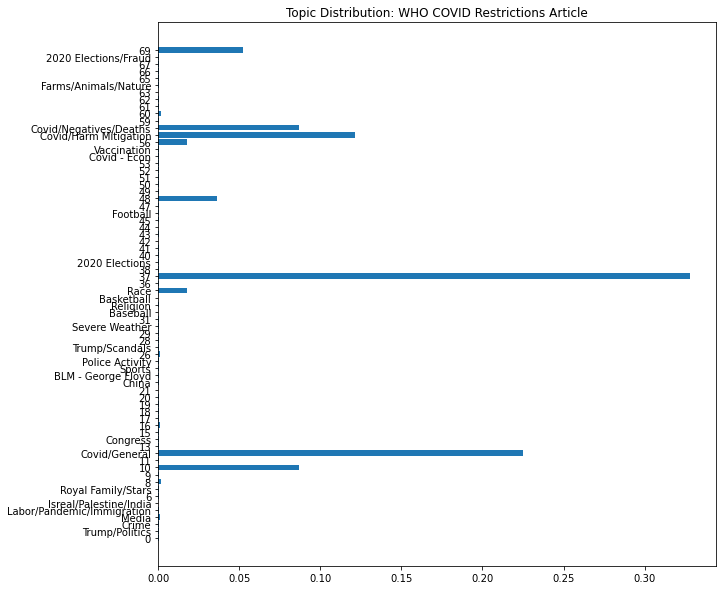

In [19]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca()

topicList = getTopics([item for item in list(range(0, 70))])
topicProps = list(articleTopics.loc[1, list(range(0, 70))])
ax.barh(topicList, topicProps)
ax.set_title("Topic Distribution: WHO COVID Restrictions Article")


## Sanity Check: NFL Football 

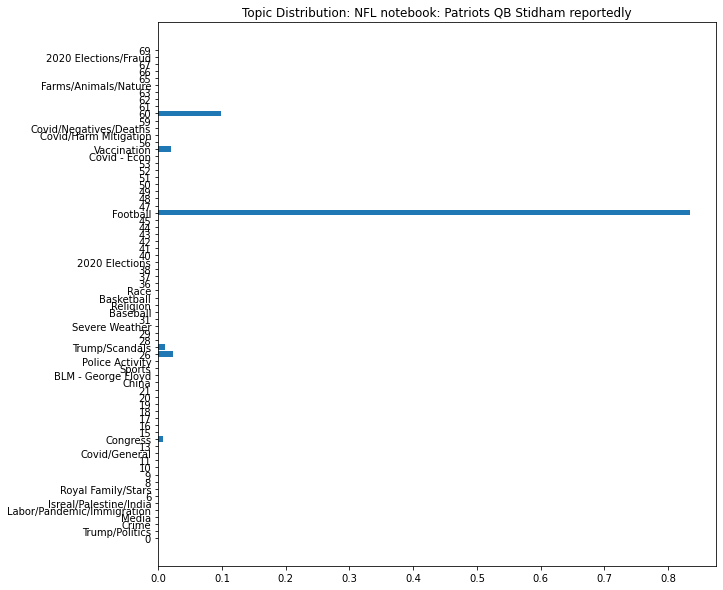

In [20]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca()

topicList = getTopics([item for item in list(range(0, 70))])
topicProps = list(articleTopics.loc[806156, list(range(0, 70))])
ax.barh(topicList, topicProps)
ax.set_title("Topic Distribution: NFL notebook: Patriots QB Stidham reportedly")
plt.show()

## Regression 
- Farm topics vs. rurality
- Religion vs. rurality, age 

In [21]:
#rename columns so that they have meaning to us
articleTopics = articleTopics.rename(columns = topicDict)

#first row doesn't appear to contain artibule information. Remove it. 
articleTopics = articleTopics[1:]

articleTopics.head()

,index,docNum,0,Trump/Politics,Crime,Media,Labor/Pandemic/Immigration,Isreal/Palestine/India,6,Royal Family/Stars,...,predrt_0,predrt_12,predrt_3,national,id,author,url,published,published_utc,collection_utc
1,1,2973366.0,0.000768,0.000407,0.000307,0.000854,0.000310,0.000165,0.000504,0.000337,...,NaN,NaN,NaN,True,tass--2020-10-02--WHO urges against harsh rest...,NaN,https://tass.com/world/1208071,"Fri, 02 Oct 2020 20:02:33 +0300",1.601683e+09,1.601691e+09
2,2,2241142.0,0.022823,0.000107,0.000081,0.000224,0.000081,0.000043,0.000132,0.000088,...,NaN,NaN,NaN,True,sputnik--2020-04-25--Listen: New Audio Evidenc...,NaN,https://sputniknews.com/us/202004251079087667-...,"Sat, 25 Apr 2020 00:59:58 +0000",1.587791e+09,1.587777e+09
3,3,340177.0,0.000707,0.000375,0.000283,0.000786,0.000285,0.000152,0.000464,0.016177,...,30.96,45.38,23.65,False,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2883919.0,0.000216,0.000115,0.000087,0.165268,0.000087,0.000046,0.000142,0.000095,...,NaN,NaN,NaN,True,foxnews--2020-10-25--Air Force vet would be Ca...,Brie Stimson,http://feeds.foxnews.com/~r/foxnews/politics/~...,"Sun, 25 Oct 2020 10:09:49 GMT",1.603635e+09,1.603628e+09
5,5,721331.0,0.000446,0.100210,0.030170,0.000496,0.000180,0.000096,0.000292,0.000195,...,32.34,45.32,22.34,False,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
list(articleTopics.columns)

['index',
 'docNum',
 0,
 'Trump/Politics',
 'Crime',
 'Media',
 'Labor/Pandemic/Immigration',
 'Isreal/Palestine/India',
 6,
 'Royal Family/Stars',
 8,
 9,
 10,
 11,
 'Covid/General',
 13,
 'Congress',
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 'China',
 'BLM - George Floyd',
 'Sports',
 'Police Activity',
 26,
 'Trump/Scandals',
 28,
 29,
 'Severe Weather',
 31,
 'Baseball',
 'Religion',
 'Basketball',
 'Race',
 36,
 37,
 38,
 '2020 Elections',
 40,
 41,
 42,
 43,
 44,
 45,
 'Football',
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 'Covid - Econ',
 'Vaccination',
 56,
 'Covid/Harm Mitigation',
 'Covid/Negatives/Deaths',
 59,
 60,
 61,
 62,
 63,
 'Farms/Animals/Nature',
 65,
 66,
 67,
 '2020 Elections/Fraud',
 69,
 'article_id',
 'sourcedomain_id',
 'date',
 'title',
 'content',
 'url_x',
 'fips',
 'source',
 'description',
 'onlinesince',
 'rank',
 'state',
 'city',
 'lon',
 'lat',
 'county',
 'total_population',
 'white_pct',
 'black_pct',
 'hispanic_pct',
 'nonwhite_pct',
 'foreignborn_pct',
 'fema

In [23]:
farmFrame = articleTopics.loc[(articleTopics["national"] == False) & (articleTopics["rural_pct"] != "None"), ["Farms/Animals/Nature", "rural_pct"]].dropna()

In [24]:
farmFrame

,Farms/Animals/Nature,rural_pct
3,0.000299,24.0795911345345
5,0.120157,59.1439688715953
8,0.000024,26.4202118571673
10,0.000086,12.6943567441841
11,0.000134,3.63998112413432
...,...,...
806131,0.000285,0.591863978896486
806144,0.001565,52.8367908022994
806146,0.000050,19.518468243195
806150,0.001044,13.0393412625801


## Regression: rural topic mentions ~ rurality
- tiny R^2
- statistically significant coeff., but n is huge
- Uncorrelated errors assumption is clearly not met, given that there is significant spatial and time autocorrelation in the data
- Assumption of Linearity is not met, given that our data is bounded (interpretation doesn't really make any sense) 
- Coefficient interpretation: a 1% increase in rurality of the county of news outlets is associated with a .04% increase in coverage of the Farms/Animals/Nature topic. 
- we could use beta regression if response has beta distribution, also look into binomial glm (a.k.a logistic) 

In [25]:
y = np.array(farmFrame["Farms/Animals/Nature"])

#this was originally a string 
X = np.array(farmFrame["rural_pct"], dtype="double")
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                          1.443e+04
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                        0.00
Time:                        15:10:25   Log-Likelihood:                      4.6413e+05
No. Observations:              359180   AIC:                                 -9.283e+05
Df Residuals:                  359179   BIC:                                 -9.282e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0004    3.1e-06    120.111      0.000       0.000       0.000
==============================================================================
Omnibus:                   412751.932   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32796708.574
Skew:                           6.233   Prob(JB):                         0.00
Kurtosis:                      48.123   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y

array([2.98713294e-04, 1.20156811e-01, 2.38305491e-05, ...,
       4.96713913e-05, 1.04441198e-03, 4.88973443e-05])

In [27]:
X.astype(float)

array([24.07959113, 59.14396887, 26.42021186, ..., 19.51846824,
       13.03934126, 62.83043119])

Text(0.5, 1.0, 'Rurality vs. Farm/Animal/Nature Topic')

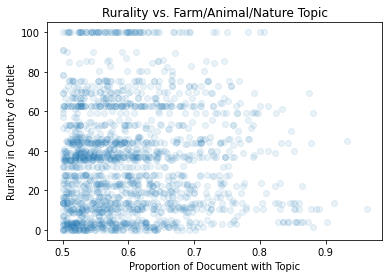

In [28]:
highFarm = farmFrame.loc[farmFrame["Farms/Animals/Nature"] > .5]
plt.scatter(highFarm["Farms/Animals/Nature"].astype(float), highFarm["rural_pct"].astype(float), alpha=.095)
plt.xlabel("Proportion of Document with Topic")
plt.ylabel("Rurality in County of Outlet")
plt.title("Rurality vs. Farm/Animal/Nature Topic")

In [29]:
godFrame = articleTopics.loc[(articleTopics["national"] == False) & (articleTopics["rural_pct"] != "None"), ["Religion", "rural_pct"]].dropna()

In [30]:
y = np.array(godFrame["Religion"])

#this was originally a string 
X = np.array(godFrame["rural_pct"], dtype="double")
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              3503.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                        0.00
Time:                        15:10:26   Log-Likelihood:                      7.1151e+05
No. Observations:              359180   AIC:                                 -1.423e+06
Df Residuals:                  359179   BIC:                                 -1.423e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.226e-05   1.56e-06     59.189      0.000    8.92e-05    9.53e-05
==============================================================================
Omnibus:                   637527.127   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        669184164.032
Skew:                          13.003   Prob(JB):                         0.00
Kurtosis:                     212.852   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
godFrame = articleTopics.loc[(articleTopics["national"] == False) & (articleTopics["rural_pct"] != "None"), ["Religion", "rural_pct"]].dropna()

NameError: name 'articleTopics' is not defined

In [32]:
list(articleTopics.columns)

['index',
 'docNum',
 0,
 'Trump/Politics',
 'Crime',
 'Media',
 'Labor/Pandemic/Immigration',
 'Isreal/Palestine/India',
 6,
 'Royal Family/Stars',
 8,
 9,
 10,
 11,
 'Covid/General',
 13,
 'Congress',
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 'China',
 'BLM - George Floyd',
 'Sports',
 'Police Activity',
 26,
 'Trump/Scandals',
 28,
 29,
 'Severe Weather',
 31,
 'Baseball',
 'Religion',
 'Basketball',
 'Race',
 36,
 37,
 38,
 '2020 Elections',
 40,
 41,
 42,
 43,
 44,
 45,
 'Football',
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 'Covid - Econ',
 'Vaccination',
 56,
 'Covid/Harm Mitigation',
 'Covid/Negatives/Deaths',
 59,
 60,
 61,
 62,
 63,
 'Farms/Animals/Nature',
 65,
 66,
 67,
 '2020 Elections/Fraud',
 69,
 'article_id',
 'sourcedomain_id',
 'date',
 'title',
 'content',
 'url_x',
 'fips',
 'source',
 'description',
 'onlinesince',
 'rank',
 'state',
 'city',
 'lon',
 'lat',
 'county',
 'total_population',
 'white_pct',
 'black_pct',
 'hispanic_pct',
 'nonwhite_pct',
 'foreignborn_pct',
 'fema

In [106]:
ruralFrame = articleTopics.loc[(articleTopics["national"] == False) & (articleTopics["rural_pct"] != "None")]
interestVars = ["rural_pct","Trump/Politics", "Crime", "Media", "Labor/Pandemic/Immigration", "Covid/General", "Congress", "China", "BLM - George Floyd", "Severe Weather", "Religion", "Baseball", "Basketball", "Race", "Covid/Harm Mitigation", "Covid/Negatives/Deaths", "Farms/Animals/Nature", "2020 Elections/Fraud"]
allFrame = ruralFrame[interestVars].dropna()
allFrame

,rural_pct,Trump/Politics,Crime,Media,Labor/Pandemic/Immigration,Covid/General,Congress,China,BLM - George Floyd,Severe Weather,Religion,Baseball,Basketball,Race,Covid/Harm Mitigation,Covid/Negatives/Deaths,Farms/Animals/Nature,2020 Elections/Fraud
3,24.0795911345345,0.000375,0.000283,0.000786,0.000285,0.000855,0.000468,0.000391,0.000489,0.000327,0.000179,0.000125,0.000146,0.000447,0.000668,0.000480,0.000299,0.000284
5,59.1439688715953,0.100210,0.030170,0.000496,0.000180,0.000539,0.000295,0.000246,0.000308,0.000206,0.000113,0.000079,0.010090,0.000282,0.000421,0.000302,0.120157,0.000179
8,26.4202118571673,0.000030,0.000023,0.000063,0.374694,0.022852,0.012695,0.000031,0.000039,0.000026,0.000014,0.000010,0.000012,0.000036,0.000053,0.000038,0.000024,0.000023
10,12.6943567441841,0.000107,0.000081,0.100213,0.000082,0.000245,0.000134,0.000112,0.000140,0.000094,0.000051,0.000036,0.000042,0.000128,0.000191,0.000137,0.000086,0.018261
11,3.63998112413432,0.000169,0.000127,0.000354,0.000128,0.000385,0.000211,0.000176,0.000220,0.000147,0.000081,0.000056,0.000066,0.000201,0.000301,0.000216,0.000134,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806131,0.591863978896486,0.000358,0.015416,0.000751,0.000272,0.000816,0.000447,0.000373,0.000467,0.000312,0.000171,0.000120,0.000140,0.000427,0.000637,0.000458,0.000285,0.000271
806144,52.8367908022994,0.001965,0.001483,0.004122,0.001496,0.004481,0.002453,0.002049,0.002562,0.001715,0.000940,0.000656,0.000767,0.002345,0.003499,0.002515,0.001565,0.001490
806146,19.518468243195,0.000062,0.000047,0.000131,0.000047,0.000142,0.000078,0.000065,0.000081,0.000054,0.000030,0.000021,0.000024,0.000074,0.000111,0.000080,0.000050,0.000047
806150,13.0393412625801,0.001311,0.000989,0.002750,0.000998,0.002990,0.001637,0.001367,0.001709,0.001144,0.000627,0.000438,0.000512,0.001564,0.501608,0.001678,0.001044,0.000994


In [107]:
#interestVars.remove("rural_pct")
interestVars

['rural_pct',
 'Trump/Politics',
 'Crime',
 'Media',
 'Labor/Pandemic/Immigration',
 'Covid/General',
 'Congress',
 'China',
 'BLM - George Floyd',
 'Severe Weather',
 'Religion',
 'Baseball',
 'Basketball',
 'Race',
 'Covid/Harm Mitigation',
 'Covid/Negatives/Deaths',
 'Farms/Animals/Nature',
 '2020 Elections/Fraud']

In [114]:
y = np.array(allFrame["rural_pct"], dtype="double")

#this was originally a string
Xdf = allFrame.drop(columns=["rural_pct"])
X = np.array(sm.add_constant(Xdf))

model = sm.OLS(y,X)
results = model.fit()
results.summary(xname=["intercept"] + list(Xdf.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     390.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:17:14   Log-Likelihood:            -1.6647e+06
No. Observations:              359180   AIC:                         3.329e+06
Df Residuals:                  359162   BIC:                         3.330e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                     26.8696      0.057    467.339      0.000      26.757      26.982
Trump/Politics                -1.3259      0.521     -2.545      0.011      -2.347      -0.305
Crime                         -7.7910      0.304    -25.603      0.000      -8.387      -7.195
Media                         -9.8237      0.905    -10.852      0.000     -11.598      -8.049
Labor/Pandemic/Immigration   -24.6401      1.002    -24.602      0.000     -26.603     -22.677
Covid/General                -14.8776      0.569    -26.145      0.000     -15.993     -13.762
Congress                      -9.0573      0.722    -12.548      0.000     -10.472      -7.643
China                        -30.6842      1.352    -22.696      0.000     -33.334     -28.034
BLM - George Floyd           -14.5850      0.642    -22.733      0.000     -15.842     -13.328
Severe Weather                -5.7946      0.436    -13.280      0.000      -6.650      -4.939
Religion                       9.6406      1.252      7.697      0.000       7.186      12.095
Baseball                     -10.6633      0.414    -25.774      0.000     -11.474      -9.852
Basketball                   -12.5334      0.488    -25.689      0.000     -13.490     -11.577
Race                         -25.4384      1.083    -23.493      0.000     -27.561     -23.316
Covid/Harm Mitigation          6.7219      0.610     11.020      0.000       5.526       7.917
Covid/Negatives/Deaths         0.5944      0.429      1.386      0.166      -0.246       1.435
Farms/Animals/Nature          22.8810      0.632     36.213      0.000      21.643      24.119
2020 Elections/Fraud          -4.3053      0.774     -5.564      0.000      -5.822      -2.789
==============================================================================
Omnibus:                    35359.222   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47110.372
Skew:                           0.887   Prob(JB):                         0.00
Kurtosis:                       2.983   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
X.shape

(359180, 18)

In [110]:
y.shape

(359180,)

In [102]:
#Get all topics 
allFrame = ruralFrame.iloc[:,list(range(2,72)) + [list(ruralFrame.columns).index("rural_pct")]]

In [103]:
y = np.array(allFrame["rural_pct"], dtype="double")

#this was originally a string
Xdf = allFrame.drop(columns=["rural_pct"])
X = np.array(Xdf)

model = sm.OLS(y,X)
results = model.fit()
results.summary(xname=list(Xdf.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     662.2
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:57:34   Log-Likelihood:            -1.6465e+06
No. Observations:              359180   AIC:                         3.293e+06
Df Residuals:                  359110   BIC:                         3.294e+06
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
0                             21.8793      1.064     20.572      0.000      19.795      23.964
Trump/Politics                27.9867      0.497     56.361      0.000      27.013      28.960
Crime                         18.8978      0.281     67.217      0.000      18.347      19.449
Media                         21.2844      0.858     24.816      0.000      19.603      22.965
Labor/Pandemic/Immigration    11.0277      0.956     11.532      0.000       9.153      12.902
Isreal/Palestine/India        -2.6827      1.820     -1.474      0.140      -6.250       0.884
6                             33.1815      0.517     64.133      0.000      32.167      34.196
Royal Family/Stars             2.1389      1.491      1.434      0.151      -0.784       5.062
8                             18.9938      0.801     23.700      0.000      17.423      20.565
9                             24.9013      0.808     30.807      0.000      23.317      26.486
10                            -6.3535      0.727     -8.734      0.000      -7.779      -4.928
11                            35.4282      0.952     37.202      0.000      33.562      37.295
Covid/General                 13.2347      0.539     24.572      0.000      12.179      14.290
13                            65.1750      0.758     85.927      0.000      63.688      66.662
Congress                      22.7555      0.701     32.473      0.000      21.382      24.129
15                             8.8509      0.955      9.266      0.000       6.979      10.723
16                            31.7177      0.680     46.662      0.000      30.385      33.050
17                            43.1656      0.341    126.446      0.000      42.496      43.835
18                            20.1102      1.467     13.707      0.000      17.235      22.986
19                             7.0978      0.980      7.239      0.000       5.176       9.019
20                            16.3574      1.086     15.061      0.000      14.229      18.486
21                            25.6892      0.795     32.299      0.000      24.130      27.248
China                          8.6715      1.293      6.709      0.000       6.138      11.205
BLM - George Floyd            13.8108      0.609     22.684      0.000      12.618      15.004
Sports                        18.6523      0.560     33.285      0.000      17.554      19.751
Police Activity               21.5493      0.265     81.287      0.000      21.030      22.069
26                            30.3386      0.758     40.044      0.000      28.854      31.824
Trump/Scandals                18.3179      1.374     13.337      0.000      15.626      21.010
28                            53.3910      0.978     54.570      0.000      51.473      55.309
29                           -13.4337      

In [104]:
allFrame["rural_pct"]

3          24.0795911345345
5          59.1439688715953
8          26.4202118571673
10         12.6943567441841
11         3.63998112413432
                ...        
806131    0.591863978896486
806144     52.8367908022994
806146      19.518468243195
806150     13.0393412625801
806156     62.8304311876284
Name: rural_pct, Length: 359180, dtype: object